<a href="https://colab.research.google.com/github/FERMEN23/CNN/blob/main/Modelo_entrenado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%time
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 28.92 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.
CPU times: user 105 ms, sys: 24 ms, total: 129 ms
Wall time: 8.58 s


In [3]:
%%time
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#Arquitectura de red Efficeintnet
!pip install efficientnet_pytorch
!pip install tensorboardX

     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=a3b8eeb516661b6498f0b0453d0a03debf78d94f33c4b84e6cc165284da6f47d
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-xg43ct5t/pycocotools_596450003e9c49adb4aaea4d2d0dfe00
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-xg43ct5t/pycocotools_596450003e9c49adb4aaea4d2d0dfe00
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263847 sha256=8f711b10353e796aff73df0e49c1cf304194338c9882d86f93caac8d449aeaae
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [4]:
#recuperar pesos entrenados
!mkdir '/trained'

El nombre del archivo donde se guardaron nuestros pesos tiene el nombre signatrix_efficientdet_coco seguido de la fecha en que se cargaron a Googel Drive y es el nombre que colocamos donde están los ## en las siguientes celdas

In [5]:
!cp '/content/drive/MyDrive/signatrix_efficientdet_coco_2021-11-04-01:59.onnx' '/trained/signatrix_efficientdet_coco.onnx'

In [6]:
!cp '/content/drive/MyDrive/signatrix_efficientdet_coco_2021-11-04-01:59.pth' '/trained/signatrix_efficientdet_coco.pth'

In [7]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [8]:
%%time
from train_detector import Detector

CPU times: user 1.05 s, sys: 803 ms, total: 1.85 s
Wall time: 26 s


In [9]:
from infer_detector import Infer
gtf = Infer();

In [10]:
#Nuestros pesos de modelos entrenados están aquí en formato onxx
gtf.Model(model_dir="/trained")

In [11]:
#Descargar el conjunto de prueba del conjunto de datos
!curl -L "ENLACE" | jar -x

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   879  100   879    0     0   1910      0 --:--:-- --:--:-- --:--:--  1906
 99 38.9M   99 38.8M    0     0  29.2M      0  0:00:01  0:00:01 --:--:-- 95.1M
curl: (23) Failed writing body (1335 != 8192)


In [12]:
%%time
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])


CPU times: user 11.8 ms, sys: 1.55 ms, total: 13.3 ms
Wall time: 17.6 ms


In [13]:
class_list

['vehicles', 'Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']

In [17]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.201s)
CPU times: user 202 ms, sys: 27.8 ms, total: 230 ms
Wall time: 232 ms


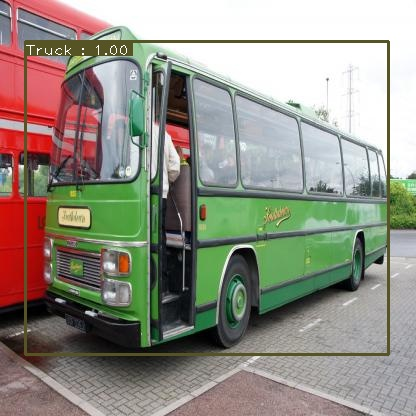

In [18]:
from IPython.display import Image
Image(filename='output.jpg')